<a href="https://colab.research.google.com/github/Musawenkosi-8/Airline-Sentiment-Analysis-Using-RNN/blob/main/Sentiment_Classification_using_RNN_Model_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [3]:
import pandas as pd
df = pd.read_csv("Tweets.csv")

In [4]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [6]:
df = df[['airline_sentiment', 'text']].dropna()

In [9]:
# cleaning of my data
df['cleaned_text'] = df['text'].apply(lean_text)

In [11]:
# Define missing variables with example values
vocab_size = 10000
max_len = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [12]:
#encoding target labels
sentiment_mapping = {'negative': 1, 'neutral': 2, 'positive': 0,'irrelevent':3}
df['encoded_sentiment'] = df['airline_sentiment'].map(sentiment_mapping)

In [14]:
# spliting my data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['encoded_sentiment'], test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [8]:
import re
def lean_text(text):
  text = re.sub(r"http\S+","",text)
  text = re.sub(r"@\w+"," ",text)
  text = re.sub(r"[^a-zA-Z\s]","",text)
  return text.lower().strip()

In [18]:
#Modelling
def build_rnn(input_length, vocab_size, embedding_dim):
  model = tf.keras.Sequential([tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length), tf.keras.layers.LSTM(64, return_sequences=True), tf.keras.layers.LSTM(32), tf.keras.layers.Dense(4, activation='softmax')])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [20]:
#Train model
def train_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=64):
  history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
  return model

In [26]:
#Evaluation
def evaluate_model(model, x_test, y_test):
  loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
  print(f"Test Loss: {loss:.4f}")
  print(f"Test Accuracy: {accuracy:.4f}") # Use 'accuracy' instead of 'test_accuracy'

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  conf_matrix = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(conf_matrix)

In [28]:
def main(x_train, y_train, x_val, y_val):
  # file_path = "Downloads" # Data is already loaded
  # x_train, y_train, x_val, y_val, x_test, y_test = load_and_preprocess_data(file_path) # Data is already preprocessed
  model = build_rnn(input_length=x_train.shape[1], vocab_size=10000, embedding_dim=16)
  model = train_model(model, x_train, y_train, x_val, y_val)
  return model # Return the trained model

**Reasoning**:
Count the occurrences of each sentiment label and create a bar plot to visualize the distribution.



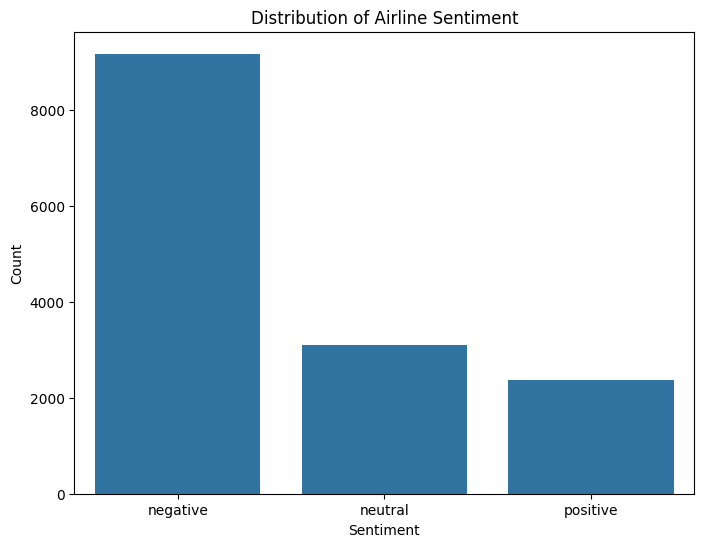

In [30]:
sentiment_counts = df['airline_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Airline Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


I need to train the model first to get the history object to plot the training and validation accuracy and loss.



In [31]:
model = main(X_train, y_train, x_val, y_val)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.6037 - loss: 1.0172 - val_accuracy: 0.6261 - val_loss: 0.9257
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 0.6226 - loss: 0.9235 - val_accuracy: 0.6261 - val_loss: 0.9227
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.6167 - loss: 0.9283 - val_accuracy: 0.6261 - val_loss: 0.9176
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.6189 - loss: 0.9276 - val_accuracy: 0.6261 - val_loss: 0.9213
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.6240 - loss: 0.9237 - val_accuracy: 0.6261 - val_loss: 0.9179
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.6202 - loss: 0.9247 - val_accuracy: 0.6261 - val_loss: 0.9184
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.6268 - loss: 0.9184 - val_accuracy: 0.6261 - val_loss: 0.9267
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.6171 - loss: 0

In [40]:
#Modelling
def build_rnn(input_length, vocab_size, embedding_dim):
  model = tf.keras.Sequential([tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length), tf.keras.layers.LSTM(64, return_sequences=True), tf.keras.layers.Dropout(0.2), tf.keras.layers.LSTM(32), tf.keras.layers.Dropout(0.2), tf.keras.layers.Dense(4, activation='softmax')])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [43]:
#Train model
def train_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=64):
  history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
  return model, history # Return model and history

In [47]:
#Evaluation
def evaluate_model(model, x_test, y_test):
  loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
  print(f"Test Loss: {loss:.4f}")
  print(f"Test Accuracy: {accuracy:.4f}") # Use 'accuracy' instead of 'test_accuracy'

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  conf_matrix = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(conf_matrix)
  return y_pred, conf_matrix # Return y_pred and conf_matrix

In [38]:
def main(x_train, y_train, x_val, y_val):
  model = build_rnn(input_length=x_train.shape[1], vocab_size=10000, embedding_dim=16)
  model = train_model(model, x_train, y_train, x_val, y_val)
  return model # Return the trained model

if __name__ == "__main__":
  model = main(X_train, y_train, x_val, y_val)
  y_pred = evaluate_model(model, x_test, y_test) # Capture the returned y_pred

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.5955 - loss: 1.0198 - val_accuracy: 0.6261 - val_loss: 0.9194
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - accuracy: 0.6314 - loss: 0.9148 - val_accuracy: 0.6261 - val_loss: 0.9183
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.6226 - loss: 0.9227 - val_accuracy: 0.6261 - val_loss: 0.9196
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.6228 - loss: 0.9234 - val_accuracy: 0.6261 - val_loss: 0.9175
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.6196 - loss: 0.9251 - val_accuracy: 0.6261 - val_loss: 0.9173
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.6179 - loss: 0.9295 - val_accuracy: 0.6261 - val_loss: 0.9178
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step - accuracy: 0.6237 - loss: 0.9216 - val_accuracy: 0.6261 - val_loss: 0.9178
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 116ms/step - accuracy: 0.6170 - loss: 0.9297 - val

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


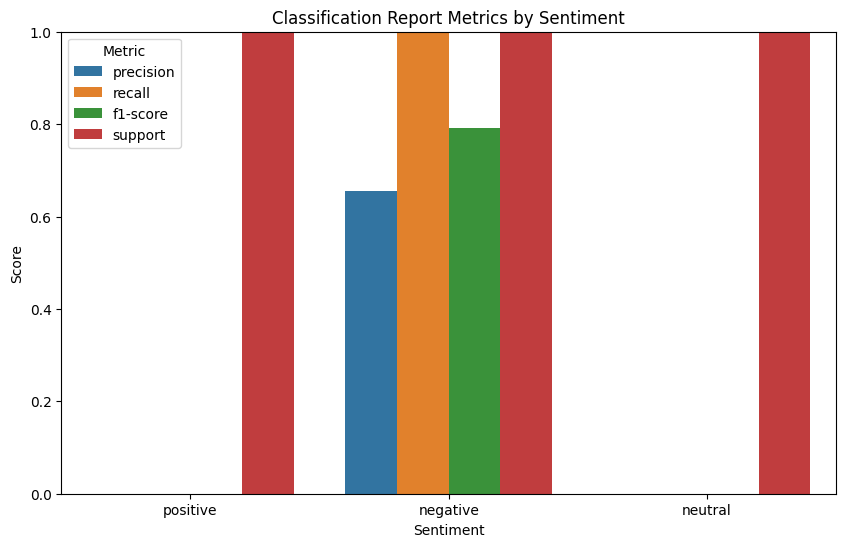

In [42]:
# Visualize Classification Report
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the classification report as a dictionary
classification_report_dict = classification_report(y_test, y_pred, output_dict=True)

# Remove the 'accuracy', 'macro avg', and 'weighted avg' entries as they are not class-specific
del classification_report_dict['accuracy']
del classification_report_dict['macro avg']
del classification_report_dict['weighted avg']

# Convert the dictionary to a pandas DataFrame
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Add a 'sentiment' column based on the index (encoded sentiment) and map back to original sentiment labels
classification_report_df['encoded_sentiment'] = classification_report_df.index.astype(int)
classification_report_df['sentiment'] = classification_report_df['encoded_sentiment'].map({v: k for k, v in sentiment_mapping.items()})

# Melt the DataFrame to long format for easier plotting
classification_report_melted = classification_report_df.melt(id_vars=['sentiment', 'encoded_sentiment'], var_name='metric', value_name='score')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barhplot(x='sentiment', y='score', hue='metric', data=classification_report_melted)
plt.title('Classification Report Metrics by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.ylim(0, 1) # Limit y-axis to 0-1 for scores
plt.legend(title='Metric')
plt.show()

In [48]:
def main(x_train, y_train, x_val, y_val):
  model = build_rnn(input_length=x_train.shape[1], vocab_size=10000, embedding_dim=16)
  model, history = train_model(model, x_train, y_train, x_val, y_val)
  return model, history # Return the trained model and history

if __name__ == "__main__":
  model, history = main(X_train, y_train, x_val, y_val)
  y_pred, conf_matrix = evaluate_model(model, x_test, y_test) # Capture the returned y_pred and conf_matrix

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 27s 131ms/step - accuracy: 0.6043 - loss: 1.0293 - val_accuracy: 0.6261 - val_loss: 0.9197
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - accuracy: 0.6288 - loss: 0.9259 - val_accuracy: 0.6261 - val_loss: 0.9211
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step - accuracy: 0.6280 - loss: 0.9287 - val_accuracy: 0.6261 - val_loss: 0.9205
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 39s 136ms/step - accuracy: 0.6169 - loss: 0.9356 - val_accuracy: 0.6261 - val_loss: 0.9187
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 136ms/step - accuracy: 0.6162 - loss: 0.9363 - val_accuracy: 0.6261 - val_loss: 0.9181
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 41s 137ms/step - accuracy: 0.6234 - loss: 0.9251 - val_accuracy: 0.6261 - val_loss: 0.9176
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 132ms/step - accuracy: 0.6175 - loss: 0.9303 - val_accuracy: 0.6261 - val_loss: 0.9176
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 143ms/step - accuracy: 0.6192 - loss: 0.9297 - val

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


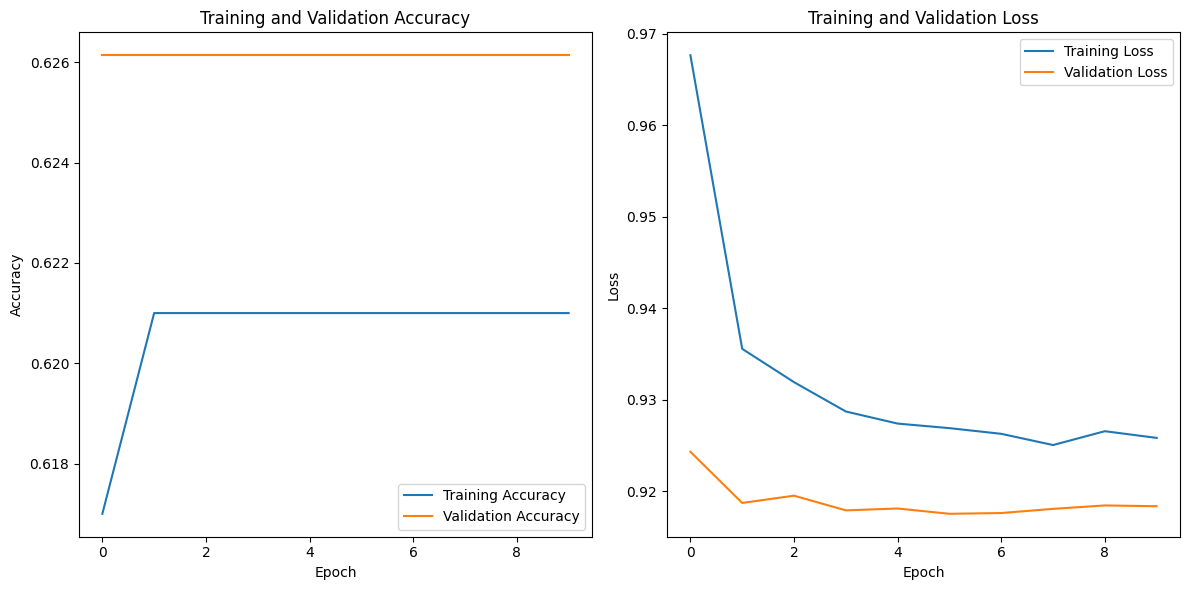

In [45]:
# Visualize training history
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

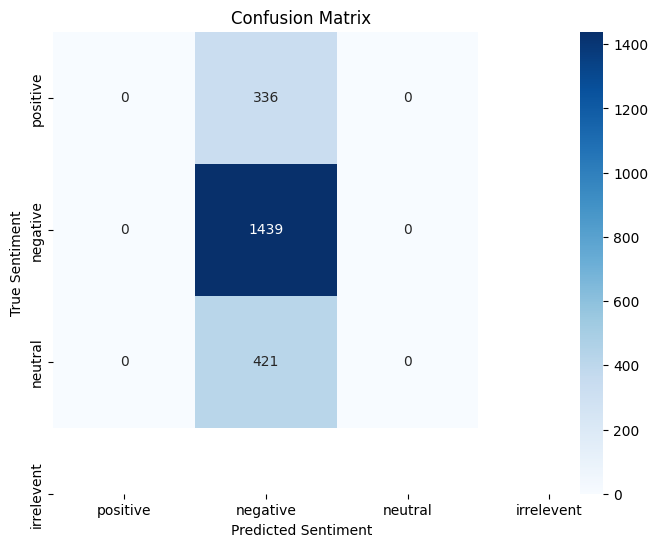

In [49]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
# Add labels for the classes if you have them
sentiment_labels = ['positive', 'negative', 'neutral', 'irrelevent'] # Based on your sentiment_mapping
plt.xticks(ticks=np.arange(len(sentiment_labels)) + 0.5, labels=sentiment_labels)
plt.yticks(ticks=np.arange(len(sentiment_labels)) + 0.5, labels=sentiment_labels)
plt.show()

In [53]:
    pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 98.9 MB/s eta 0:00:00
Processing /colabtools/dist/google_colab-1.0.0.tar.gz (from -r requirements.txt (line 168))
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/colabtools/dist/google_colab-1.0.0.tar.gz'

